In [15]:
# Import dependencies
from citipy import citipy
import numpy as np
import requests
from config import weather_api_key
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a list to hold city names
cities = []

# Create set of random lat/long combinations
## Temporarily setting this to 10 values to limit the number of calls I'm making to the API
## should be 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=10)
lngs = np.random.uniform(low=-180.000, high=180.000, size=10)

# Create list of lat/long pairs
lat_lngs = zip(lats, lngs)
coordinates = list(lat_lngs)

# Identify the nearest city for each lat/long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if city is unique, add to list of cities
    if city not in cities:
        cities.append(city)

# Print number of cities
len(cities)

10

In [3]:
# Import time and datetime libraries
import time
from datetime import datetime

In [4]:
# Create a variable to store city data
city_data = []
# Print the beginning of the logging
print("Beginning data retreival")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning data retreival
------------------------


In [5]:
# Create base url to access api
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through the cities
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create url for each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers with city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Increase record count
    record_count += 1
    
    # Run API request for each city
    try:
        # Get JSON Data from query
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If error is experienced, skip city
    except:
        print(f"City -{city}- not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | ostrovnoy
Processing Record 3 of Set 1 | ketou
Processing Record 4 of Set 1 | ozinki
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | muros
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | saint-augustin
Processing Record 9 of Set 1 | ternate
Processing Record 10 of Set 1 | new norfolk
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
city_data

[{'City': 'Atuona',
  'Lat': -9.8,
  'Lng': -139.0333,
  'Max Temp': 78.24,
  'Humidity': 75,
  'Cloudiness': 19,
  'Wind Speed': 18.43,
  'Country': 'PF',
  'Date': '2022-06-09 00:14:08'},
 {'City': 'Ostrovnoy',
  'Lat': 68.0531,
  'Lng': 39.5131,
  'Max Temp': 51.13,
  'Humidity': 60,
  'Cloudiness': 81,
  'Wind Speed': 13.62,
  'Country': 'RU',
  'Date': '2022-06-09 00:14:08'},
 {'City': 'Ketou',
  'Lat': 7.3633,
  'Lng': 2.5998,
  'Max Temp': 75.24,
  'Humidity': 93,
  'Cloudiness': 35,
  'Wind Speed': 4,
  'Country': 'BJ',
  'Date': '2022-06-09 00:14:09'},
 {'City': 'Ozinki',
  'Lat': 51.1786,
  'Lng': 49.6769,
  'Max Temp': 56.82,
  'Humidity': 74,
  'Cloudiness': 88,
  'Wind Speed': 14.72,
  'Country': 'RU',
  'Date': '2022-06-09 00:14:09'},
 {'City': 'Dikson',
  'Lat': 73.5069,
  'Lng': 80.5464,
  'Max Temp': 31.87,
  'Humidity': 85,
  'Cloudiness': 79,
  'Wind Speed': 4.36,
  'Country': 'RU',
  'Date': '2022-06-09 00:14:09'},
 {'City': 'Muros',
  'Lat': 42.7762,
  'Lng': -9.06

In [28]:
# Create dataframe of the generated values from earlier
city_data_df = pd.DataFrame(city_data)

# Create new column order for dataframe
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

# Preview city_data_df
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-06-09 00:14:08,-9.8000,-139.0333,78.24,75,19,18.43
1,Ostrovnoy,RU,2022-06-09 00:14:08,68.0531,39.5131,51.13,60,81,13.62
2,Ketou,BJ,2022-06-09 00:14:09,7.3633,2.5998,75.24,93,35,4.00
3,Ozinki,RU,2022-06-09 00:14:09,51.1786,49.6769,56.82,74,88,14.72
4,Dikson,RU,2022-06-09 00:14:09,73.5069,80.5464,31.87,85,79,4.36


In [ ]:
# Create output file
output_data_file = "weather_data/cities.csv"
# Export output file
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting Weather Data

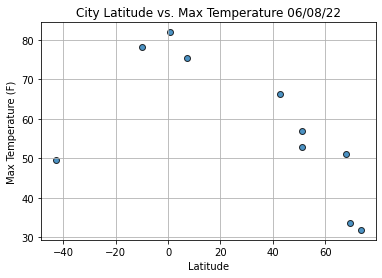

In [21]:
# Create scatter for lat and max temp
plt.scatter(city_data_df["Lat"],
           city_data_df["Max Temp"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig1.png")

# Show Plot
plt.show()

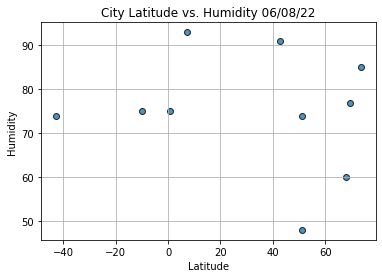

In [22]:
# Create scatter for lat and humidity
plt.scatter(city_data_df["Lat"],
           city_data_df["Humidity"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig2.png")

# Show Plot
plt.show()

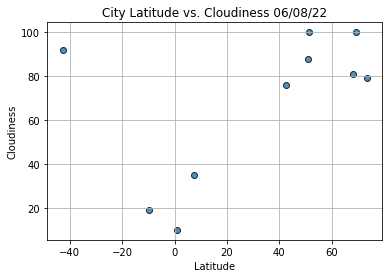

In [23]:
# Create scatter for lat and cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Cloudiness"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig3.png")

# Show Plot
plt.show()

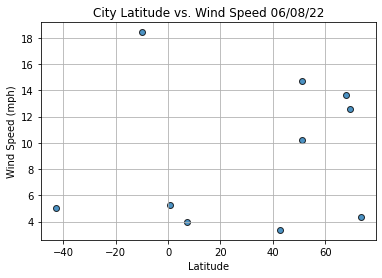

In [25]:
# Create scatter for lat and cloudiness
plt.scatter(city_data_df["Lat"],
           city_data_df["Wind Speed"],
           edgecolor="black",
           linewidths=1,
           marker="o",
           alpha=0.8,
           label="Cities")

# Assign other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure
plt.savefig("weather_data/Fig4.png")

# Show Plot
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create linear regression function to perform analysis on weather data
# and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coords):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_val, p_val, std_err) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    
    # Get equation of the line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate text on plot
    plt.annotate(line_eq, text_coords, fontsize=15, color="r")
    plt.title(title),
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lng"] < 0)]

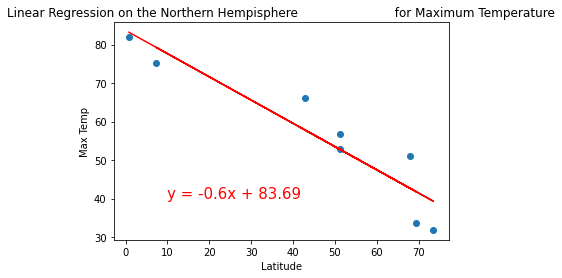

In [35]:
# Northern Hemisphere regression - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \
                        for Maximum Temperature', 'Max Temp', (10, 40))

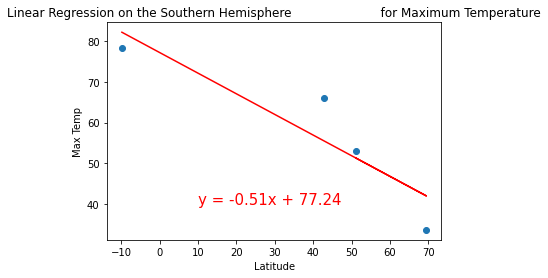

In [36]:
# Southern Hemisphere regression - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (10, 40))

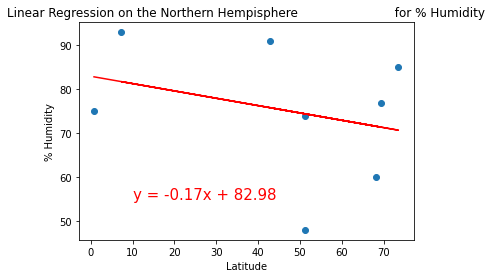

In [43]:
# Northern Hemisphere regression - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \
                        for % Humidity', '% Humidity', (10, 55))

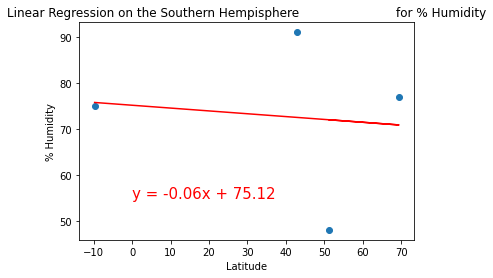

In [44]:
# Southern Hemisphere regression - Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hempisphere \
                        for % Humidity', '% Humidity', (0, 55))

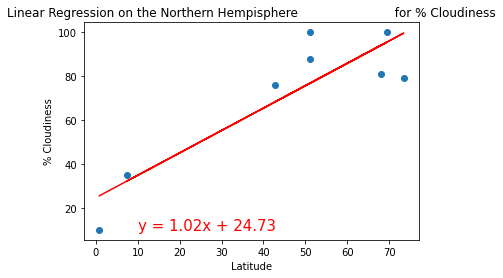

In [46]:
# Northern Hemisphere regression - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \
                        for % Cloudiness', '% Cloudiness', (10, 10))

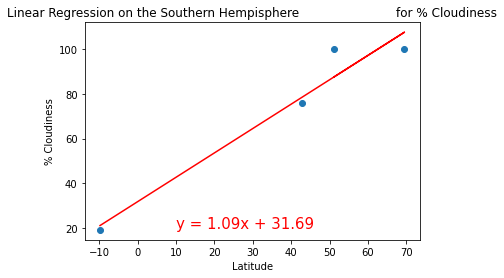

In [49]:
# Southern Hemisphere regression - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hempisphere \
                        for % Cloudiness', '% Cloudiness', (10, 20))

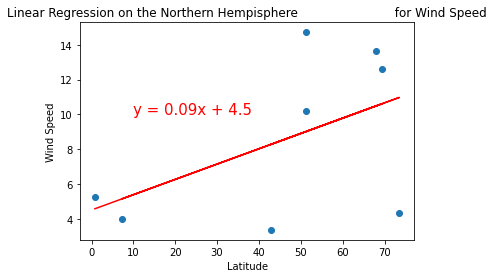

In [50]:
# Northern Hemisphere regression - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hempisphere \
                        for Wind Speed', 'Wind Speed', (10, 10))

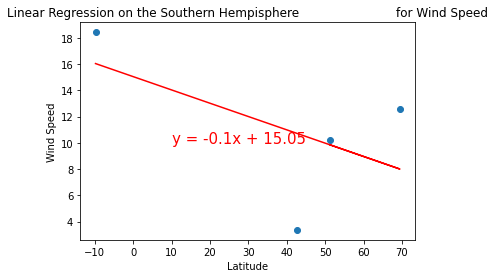

In [51]:
# Northern Hemisphere regression - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hempisphere \
                        for Wind Speed', 'Wind Speed', (10, 10))